In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

%matplotlib inline

### Notes for #4

In [42]:
N = 250

x2 = (np.random.rand(N,1) - 0.5)*3.2
x3 = (np.random.rand(N,1) - 0.5)*1.7
u  = np.random.randn(N,1)
v  = np.random.randn(N,1)

alpha_true = np.array([[2.,0.3,1.1,0.2,1.35]]).T
gamma_true = np.array([[0.35, 0.7, 0.4]]).T

X_z = np.hstack([np.ones((N,1)),x2,x3])
z = np.dot(X_z, gamma_true)+v
#X_y_ohnez = np.hstack([np.ones((N,1)),x2,x3,np.square(x2), np.multiply(x2,x3)])
X_y_mitz  = np.hstack([np.ones((N,1)),x2,x3,z, np.multiply(x2,z)])
y = np.dot(X_y_mitz, alpha_true)+u



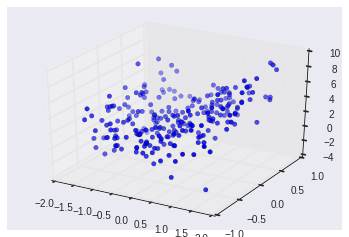

In [43]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2,x3,y)
plt.show()

In [66]:
OLS = linear_model.LinearRegression()
OLS.fit(X_y_mitz[:,1:], y)

print 'Intercept: \n', OLS.intercept_
print 'Coefficients: \n', OLS.coef_
# The mean squared error
print "Mean squared error: \n", np.mean((OLS.predict(X_y_mitz[:,1:]) - y) ** 2)

Intercept: 
[ 1.86803911]
Coefficients: 
[[ 0.29535732  1.11321658  0.21107203  1.35446545]]
Mean squared error: 
0.973932641453


In [67]:
eigval, eigvec = np.linalg.eigh(np.cov(X_y_mitz[:,1:].T))
eigval

array([ 0.21845225,  0.42982475,  1.30293064,  1.79949268])

(0.0, 4)

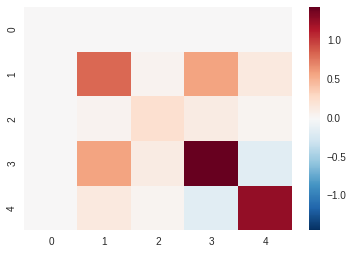

In [69]:
sns.heatmap(np.cov(X_y_mitz.T))
np.linalg.det(np.cov(X_y_mitz.T)),np.linalg.matrix_rank(np.cov(X_y_mitz.T))

### Notes for # 5

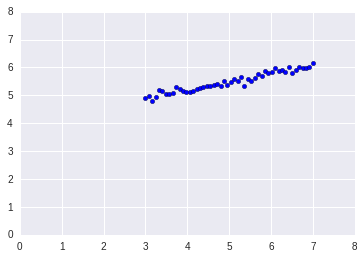

4.02271726634 [ 0.29211298]
5.48328215019 [ 1.46056488] [ 4.02271727]


In [4]:
mu = (3,4)
x5 = np.linspace(0,4) + mu[0]
e = np.random.normal(0,0.1,size=x5.shape)
y5 = x5*0.3 + e + mu[1]
plt.scatter(x5, y5)
plt.gca().set_xlim((0,8))
plt.gca().set_ylim((0,8))
plt.show()
OLS5 = linear_model.LinearRegression()
OLS5.fit(x5.reshape(-1,1), y5)
print OLS5.intercept_, OLS5.coef_
print np.mean(y5), OLS5.coef_*np.mean(x5), np.mean(y5) - OLS5.coef_*np.mean(x5)

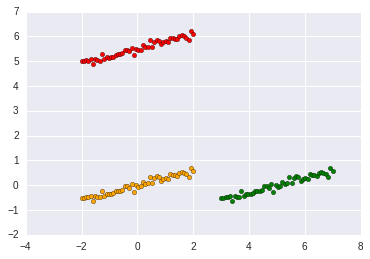

In [11]:
plt.scatter(x5 - np.mean(x5), y5, c='red')
plt.scatter(x5, y5 - np.mean(y5), c='green')
plt.scatter(x5 - np.mean(x5), y5 - np.mean(y5), c='orange')
ylims = plt.gca().get_ylim()


In [65]:
x1, x2 = np.random.randn(100), np.random.randn(100)
x3 = x2 * 2
cov = np.cov(np.array([np.ones(100),x1,x2]))
print cov
print 'Cov1:', np.linalg.matrix_rank(cov)
cov = np.cov(np.array([x1,x2,x3]))
print cov
print 'Cov2:', np.linalg.matrix_rank(cov)

[[ 0.          0.          0.        ]
 [ 0.          0.97505887 -0.03424658]
 [ 0.         -0.03424658  1.49937736]]
Cov1: 2
[[ 0.97505887 -0.03424658 -0.06849317]
 [-0.03424658  1.49937736  2.99875472]
 [-0.06849317  2.99875472  5.99750944]]
Cov2: 2
